In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

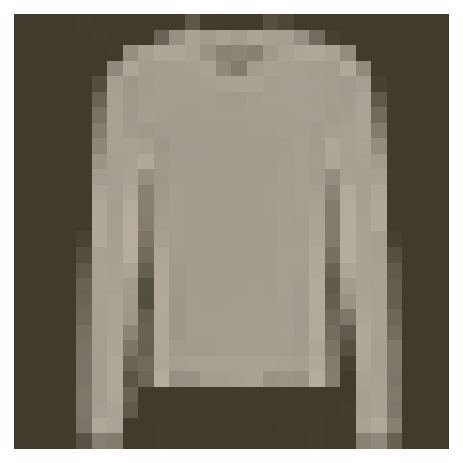

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

# Train a Network

In [4]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

In [5]:
print("Random Weights & Bias \n\n", model.state_dict())

Random Weights & Bias 

 OrderedDict([('0.weight', tensor([[-0.0224,  0.0122,  0.0071,  ..., -0.0343, -0.0114, -0.0071],
        [-0.0148,  0.0174,  0.0332,  ..., -0.0302, -0.0046, -0.0259],
        [ 0.0244,  0.0176,  0.0189,  ...,  0.0081,  0.0227, -0.0051],
        ...,
        [-0.0232,  0.0312, -0.0016,  ..., -0.0199,  0.0069,  0.0068],
        [-0.0097, -0.0139,  0.0182,  ...,  0.0221,  0.0055,  0.0128],
        [ 0.0025, -0.0021,  0.0335,  ..., -0.0282, -0.0059, -0.0296]])), ('0.bias', tensor([ 0.0019, -0.0043, -0.0190, -0.0311, -0.0290,  0.0236,  0.0096, -0.0237,
         0.0065, -0.0128,  0.0136,  0.0164, -0.0140,  0.0057,  0.0259, -0.0035,
         0.0122,  0.0118, -0.0176,  0.0262,  0.0271, -0.0116, -0.0169,  0.0141,
        -0.0113, -0.0185,  0.0163, -0.0003,  0.0143, -0.0097,  0.0046, -0.0113,
         0.0355,  0.0351,  0.0028, -0.0071,  0.0133, -0.0197, -0.0356,  0.0217,
        -0.0083, -0.0061, -0.0204, -0.0003, -0.0021,  0.0352,  0.0028, -0.0069,
         0.0124,  0.00

In [6]:
def model_classifier(model, trainloader, testloader, learnrate):

    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=learnrate)

    steps = 0
    print_every = 40
    epochs = 2
    for i in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(len(images),-1)
            logps = model(images)
            loss = criterion(logps, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            steps += 1

            if steps % print_every == 0:
                accuracy = 0
                loss_test = 0
                with torch.no_grad():
                    model.eval()
                    for images, labels in testloader:
                        images = images.view(len(images), -1)
                        logps_test = model(images)
                        loss_test += criterion(logps_test, labels)

                        ps_test = torch.exp(logps_test)
                        top_ps, top_class = ps_test.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor))

                model.train()

                print(f'Epoch: {i+1}/{epochs} ',
                      f'Training Loss: {running_loss/print_every:.3f} ',
                      f'Test Loss: {loss_test/len(testloader):.3f} ',
                      f'Test Accuracy: {accuracy/len(testloader):.3f}')
                running_loss = 0
    return model

Train the Model and Update Weights

In [7]:
model = model_classifier(model, trainloader, testloader, learnrate = 0.001)

Epoch: 1/2  Training Loss: 1.511  Test Loss: 0.854  Test Accuracy: 0.702
Epoch: 1/2  Training Loss: 0.875  Test Loss: 0.710  Test Accuracy: 0.735
Epoch: 1/2  Training Loss: 0.715  Test Loss: 0.660  Test Accuracy: 0.745
Epoch: 1/2  Training Loss: 0.695  Test Loss: 0.599  Test Accuracy: 0.775
Epoch: 1/2  Training Loss: 0.698  Test Loss: 0.583  Test Accuracy: 0.775
Epoch: 1/2  Training Loss: 0.634  Test Loss: 0.554  Test Accuracy: 0.791
Epoch: 1/2  Training Loss: 0.581  Test Loss: 0.567  Test Accuracy: 0.790
Epoch: 1/2  Training Loss: 0.623  Test Loss: 0.554  Test Accuracy: 0.793
Epoch: 1/2  Training Loss: 0.620  Test Loss: 0.509  Test Accuracy: 0.814
Epoch: 1/2  Training Loss: 0.578  Test Loss: 0.504  Test Accuracy: 0.814
Epoch: 1/2  Training Loss: 0.532  Test Loss: 0.540  Test Accuracy: 0.800
Epoch: 1/2  Training Loss: 0.514  Test Loss: 0.488  Test Accuracy: 0.823
Epoch: 1/2  Training Loss: 0.530  Test Loss: 0.522  Test Accuracy: 0.804
Epoch: 1/2  Training Loss: 0.544  Test Loss: 0.507 

In [ ]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

steps = 0
print_every = 40
epochs = 2
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(len(images),-1)
        logps = model(images)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        steps += 1
    
        if steps % print_every == 0:
            accuracy = 0
            loss_test = 0
            with torch.no_grad():
                model.eval()
                for images, labels in testloader:
                    images = images.view(len(images), -1)
                    logps_test = model(images)
                    loss_test += criterion(logps_test, labels)

                    ps_test = torch.exp(logps_test)
                    top_ps, top_class = ps_test.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))
                    
            model.train()

            print(f'Epoch: {i+1}/{epochs} ',
                  f'Training Loss: {running_loss/print_every:.3f} ',
                  f'Test Loss: {loss_test/len(testloader):.3f} ',
                  f'Test Accuracy: {accuracy/len(testloader):.3f}')
            running_loss = 0

## Saving and loading networks

It's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's state_dict. We can see the state dict contains the weight and bias matrices for each of our layers.

In [8]:
print("Our model: \n\n", model, '\n')
print("The State Dict Keys \n\n", model.state_dict().keys())
print("\n Updated Weights & Bias \n\n", model.state_dict())

Our model: 

 Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
) 

The State Dict Keys 

 odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])

 Updated Weights & Bias 

 OrderedDict([('0.weight', tensor([[-1.0629e-02,  2.3848e-02,  1.9177e-02,  ..., -2.4077e-02,
         -9.6044e-05,  5.7990e-03],
        [ 3.1818e-03,  3.5432e-02,  5.1608e-02,  ...,  1.5174e-02,
          2.4117e-02, -6.1167e-03],
        [ 6.7755e-02,  6.0934e-02,  6.1954e-02,  ...,  5.0990e-02,
          6.7887e-02,  3.7037e-02],
        ...,
        [ 1.2702e-02,  6.7123e-02,  3.4306e-02,  ..., 

We can save state_dict of trained model to the file 'model_save.pth'

In [9]:
torch.save(model.state_dict(), "model_save.pth")

###### Define a new model with the same dimensions

In [11]:
model1 = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

Randomly initial weights and bias

In [13]:
print("Random Weights & Bias \n\n", model1.state_dict())

Random Weights & Bias 

 OrderedDict([('0.weight', tensor([[-0.0111, -0.0326, -0.0316,  ..., -0.0154, -0.0307, -0.0180],
        [ 0.0088, -0.0185,  0.0188,  ...,  0.0228, -0.0146, -0.0287],
        [-0.0076,  0.0239,  0.0042,  ..., -0.0220, -0.0321,  0.0095],
        ...,
        [ 0.0242,  0.0200, -0.0227,  ...,  0.0120,  0.0230, -0.0321],
        [-0.0252, -0.0081, -0.0233,  ...,  0.0117, -0.0356, -0.0298],
        [ 0.0298, -0.0244,  0.0031,  ...,  0.0289,  0.0311,  0.0318]])), ('0.bias', tensor([ 0.0027, -0.0156,  0.0312,  0.0081, -0.0259, -0.0323,  0.0340,  0.0161,
         0.0275, -0.0143,  0.0146, -0.0023,  0.0324,  0.0173,  0.0114,  0.0327,
         0.0211, -0.0177, -0.0104, -0.0088,  0.0352,  0.0070,  0.0229,  0.0305,
         0.0013, -0.0192, -0.0299,  0.0268,  0.0151, -0.0046,  0.0023,  0.0154,
         0.0081, -0.0207,  0.0094,  0.0068, -0.0341,  0.0216,  0.0102, -0.0252,
         0.0258, -0.0028,  0.0136, -0.0167,  0.0307, -0.0342, -0.0279,  0.0077,
         0.0269, -0.01

Load the state dict with torch.load

In [14]:
state_dict_saved = torch.load('model_save.pth')
print(state_dict_saved.keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


Loading the state dict into the network

In [15]:
model1.load_state_dict(state_dict_saved)

<All keys matched successfully>

In [16]:
print("Weights & Bias \n\n", model1.state_dict())

Weights & Bias 

 OrderedDict([('0.weight', tensor([[-1.0629e-02,  2.3848e-02,  1.9177e-02,  ..., -2.4077e-02,
         -9.6044e-05,  5.7990e-03],
        [ 3.1818e-03,  3.5432e-02,  5.1608e-02,  ...,  1.5174e-02,
          2.4117e-02, -6.1167e-03],
        [ 6.7755e-02,  6.0934e-02,  6.1954e-02,  ...,  5.0990e-02,
          6.7887e-02,  3.7037e-02],
        ...,
        [ 1.2702e-02,  6.7123e-02,  3.4306e-02,  ...,  1.4496e-02,
          4.1974e-02,  4.2661e-02],
        [-1.0375e-02, -1.4728e-02,  1.7473e-02,  ...,  3.5640e-02,
          1.0475e-02,  1.3153e-02],
        [ 3.7357e-02,  3.2882e-02,  6.8365e-02,  ...,  7.8092e-03,
          2.7375e-02,  4.6199e-03]])), ('0.bias', tensor([-0.0096, -0.0223, -0.0626, -0.0365, -0.0339,  0.0192, -0.0418, -0.0289,
        -0.0135, -0.0173, -0.0139, -0.0338, -0.0147, -0.0206,  0.0100, -0.0203,
        -0.0236,  0.0318, -0.0084,  0.0175,  0.0152, -0.0269, -0.0035,  0.0122,
        -0.0835, -0.0497, -0.0235,  0.0139,  0.0343, -0.0369,  0.0085, 

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the saved model architecture. If we create a model with a different architecture, this fails.

In [17]:
model2 = nn.Sequential(nn.Linear(784,250),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(250,125),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(125,63),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(63,10),
                     nn.LogSoftmax(dim=1))

In [18]:
# This will throw an error because the tensor sizes are wrong!
model2.load_state_dict(state_dict_saved)

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 0.weight: copying a param with shape torch.Size([256, 784]) from checkpoint, the shape in current model is torch.Size([250, 784]).
	size mismatch for 0.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([250]).
	size mismatch for 3.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([125, 250]).
	size mismatch for 3.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([125]).
	size mismatch for 6.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([63, 125]).
	size mismatch for 6.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([63]).
	size mismatch for 9.weight: copying a param with shape torch.Size([10, 64]) from checkpoint, the shape in current model is torch.Size([10, 63]).

# Saving and Loading Model with Model Architecture

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the 'model_save.pth', along with the state dict. To do this, we build a dictionary with all the information we need to compeletely rebuild the model.

Save the model with model dimensions

In [19]:
from operator import itemgetter               # for getting specific layers (hidden layers) while saving the model

In [20]:
checkpoint = {"input_size" : 784,
              "output_size" : 10,
              "hidden_layers" : [each.out_features for each in itemgetter(0,3,6,9)(model)],  #0,3,6,9 - hidden layers with weights & bias
              "state_dict" : model.state_dict()}

In [21]:
torch.save(checkpoint, 'model_save2.pth')

Loading Model dimensions, Weights & Bias

In [23]:
checkpoint1 = torch.load('model_save2.pth')

In [24]:
in_size = checkpoint1['input_size']
out_size = checkpoint1['output_size']
hidden_size = checkpoint1['hidden_layers']

In [25]:
model3 = nn.Sequential(nn.Linear(in_size,hidden_size[0]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(hidden_size[0],hidden_size[1]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(hidden_size[1],hidden_size[2]),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(hidden_size[2],hidden_size[3]),
                     nn.LogSoftmax(dim=1))

In [26]:
print("Random Weights & Bias \n\n", model3.state_dict())

Random Weights & Bias 

 OrderedDict([('0.weight', tensor([[ 0.0301, -0.0315, -0.0308,  ...,  0.0137,  0.0169, -0.0145],
        [-0.0268, -0.0189,  0.0197,  ..., -0.0048,  0.0333,  0.0240],
        [-0.0108, -0.0253,  0.0045,  ..., -0.0233,  0.0235, -0.0331],
        ...,
        [-0.0050,  0.0349, -0.0294,  ..., -0.0225, -0.0229, -0.0093],
        [ 0.0040, -0.0037,  0.0231,  ...,  0.0267, -0.0193,  0.0309],
        [ 0.0218, -0.0288, -0.0341,  ..., -0.0172,  0.0066,  0.0084]])), ('0.bias', tensor([ 0.0031, -0.0126, -0.0191,  0.0073,  0.0050,  0.0050,  0.0215, -0.0007,
         0.0352, -0.0305, -0.0122,  0.0111,  0.0002,  0.0048, -0.0108,  0.0161,
         0.0106, -0.0210,  0.0275,  0.0090, -0.0332,  0.0268,  0.0081, -0.0313,
         0.0187,  0.0276, -0.0255,  0.0249, -0.0115, -0.0241, -0.0166,  0.0152,
        -0.0239,  0.0200, -0.0352, -0.0293,  0.0312, -0.0018, -0.0202,  0.0044,
         0.0318, -0.0301,  0.0125,  0.0346,  0.0303,  0.0287, -0.0307,  0.0094,
        -0.0043,  0.03

In [27]:
model3.load_state_dict(checkpoint1['state_dict'])

<All keys matched successfully>

In [28]:
print("Weights & Bias \n\n", model3.state_dict())

Weights & Bias 

 OrderedDict([('0.weight', tensor([[-1.0629e-02,  2.3848e-02,  1.9177e-02,  ..., -2.4077e-02,
         -9.6044e-05,  5.7990e-03],
        [ 3.1818e-03,  3.5432e-02,  5.1608e-02,  ...,  1.5174e-02,
          2.4117e-02, -6.1167e-03],
        [ 6.7755e-02,  6.0934e-02,  6.1954e-02,  ...,  5.0990e-02,
          6.7887e-02,  3.7037e-02],
        ...,
        [ 1.2702e-02,  6.7123e-02,  3.4306e-02,  ...,  1.4496e-02,
          4.1974e-02,  4.2661e-02],
        [-1.0375e-02, -1.4728e-02,  1.7473e-02,  ...,  3.5640e-02,
          1.0475e-02,  1.3153e-02],
        [ 3.7357e-02,  3.2882e-02,  6.8365e-02,  ...,  7.8092e-03,
          2.7375e-02,  4.6199e-03]])), ('0.bias', tensor([-0.0096, -0.0223, -0.0626, -0.0365, -0.0339,  0.0192, -0.0418, -0.0289,
        -0.0135, -0.0173, -0.0139, -0.0338, -0.0147, -0.0206,  0.0100, -0.0203,
        -0.0236,  0.0318, -0.0084,  0.0175,  0.0152, -0.0269, -0.0035,  0.0122,
        -0.0835, -0.0497, -0.0235,  0.0139,  0.0343, -0.0369,  0.0085, 